In [1]:
import pandas as pd
from google.colab import files
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


Основными структурами данных в Pandas являются классы Series и
DataFrame. Первый из них представляет собой одномерный индексированный
массив данных некоторого фиксированного типа. Второй – это двухмерная
структура данных, представляющая собой таблицу, каждый столбец которой
содержит данные одного типа. Можно представлять её как словарь объектов
типа Series. Структура DataFrame отлично подходит для представления
реальных данных: строки соответствуют признаковым описаниям отдельных
объектов, а столбцы соответствуют признакам.
1. На рис. 3.1 представлен код в Python Notebook для загрузки
исходного набора данных.

In [ ]:
data_source = 'iris.data'
d = pd.read_table(data_source, delimiter=',')
d.head() #Рис 3.1

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Слудует обратить внимание, что первая строка набора данных
интерпретировалась как шапка таблицы (название столбцов). Данную
неточность необходимо исправить следующим образом (рис. 3.2). В таком
случае столбцы получат порядковые номера в качестве названий столбцов.


In [ ]:
d = pd.read_table(data_source, delimiter=',', header=None)
d.head() #Рис 3.2

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Исследователь также может дать символьные имена столбцам при
загрузке (рис. 3.3).

In [ ]:
d = pd.read_table(data_source, delimiter=',',
header=None,
#аргумент, который задает имена столбцов для данных
names=['sepal_length','sepal_width',
'petal_length','petal_width', 'answer'])
d.head() #Рис 3.3

,sepal_length,sepal_width,petal_length,petal_width,answer
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**2. После загрузки данных можно визуализировать полученныйы
набор данных. Для визуализации будем использовать библиотеку seaborn.**

В результате будет выведен график, отображающий распределение
объектов попарно по различным признакам

На графике попарного распределения видно преимущество символьного
обозначения столбцов – график легче интерпретировать. Отдельные классы не
отмечаются различными цветами, но видно, что на отдельных подграфиках
множества точек разделены. Следует обратить внимание на подграфики,
расположенные по диаганали. Подумайте, что они отображают?

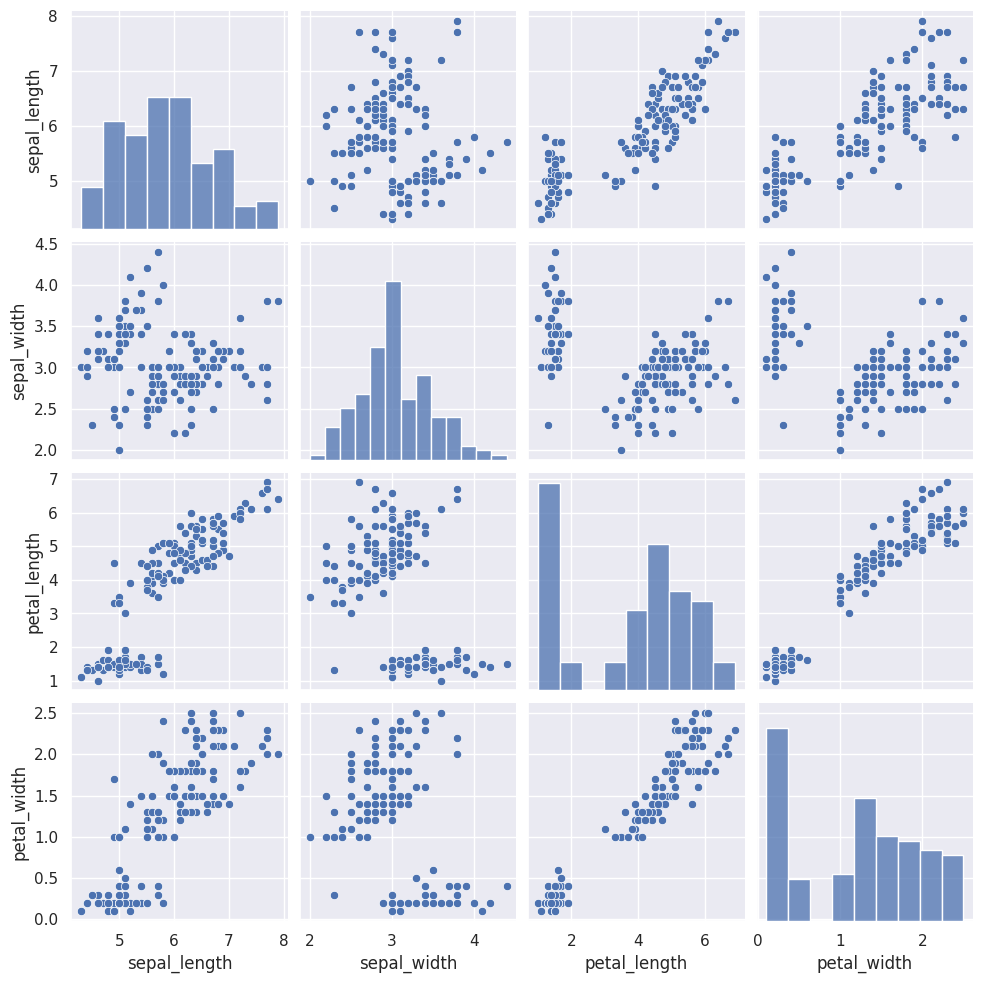

In [ ]:
#%matplotlib inline используется чтобы графики, построенные с помощью Matplotlib или Seaborn, отображались непосредственно внутри Jupyter Notebook, а не в отдельных окнах.
%matplotlib inline
#построение парных графиков
sns.pairplot(d) #Рис 3.5

**3. Для придания отдельным классам своих цветов необходимо
указать, по какому признаку разделяются точки (рис. 3.6)**

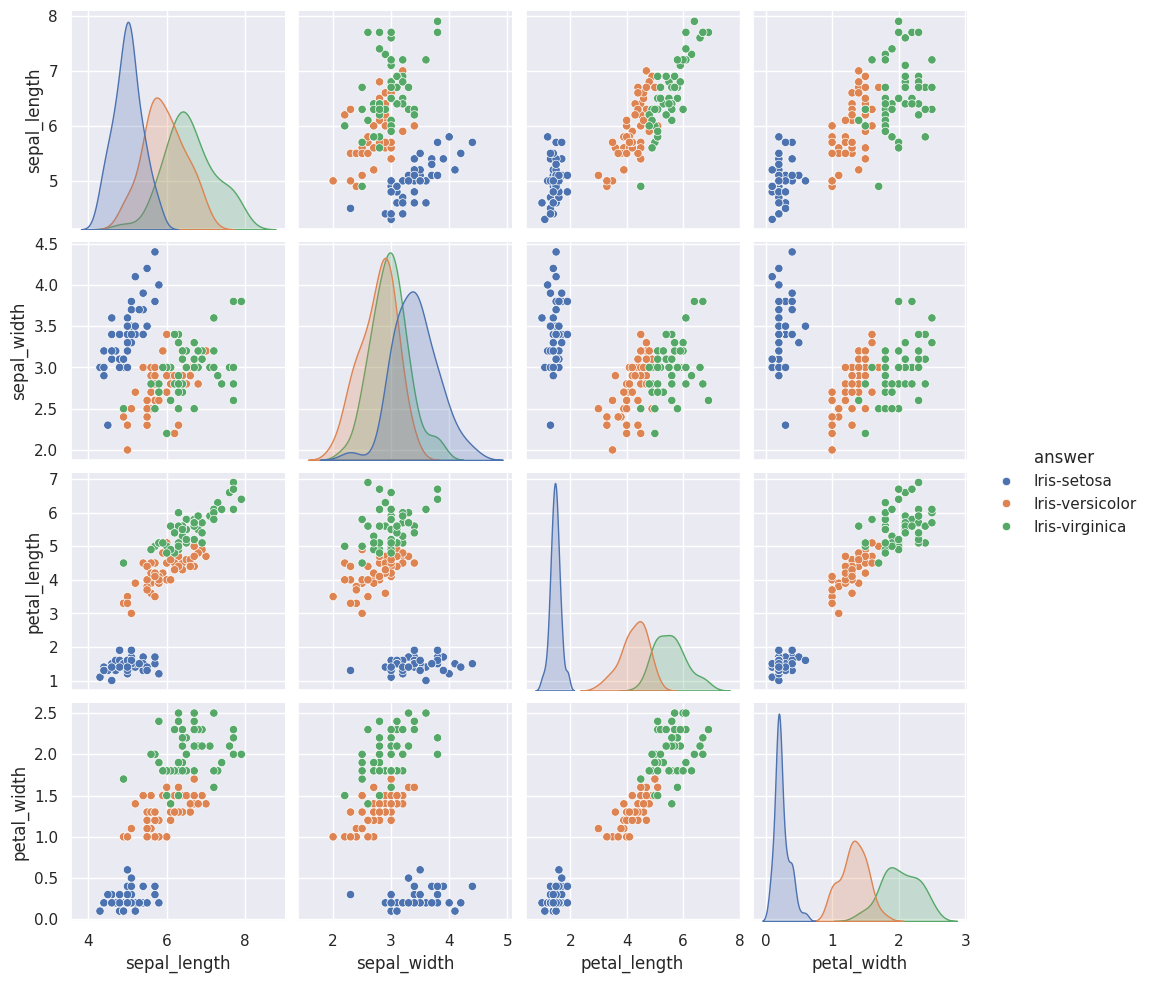

In [ ]:
%matplotlib inline
sns.pairplot(d, hue='answer')

Можно изменить маркеры каждого класса. Для этого необходимо
использовать код: sb.pairplot(d, hue='answer', markers=["o", "s", "D"]).


**4. Перейдем к построению модели.** Модель метрической
классификации должна обеспечивать следующий алгоритм работы:
пользователь вводит новое признаковое описание объекта (объект отсутствует
в обучающей выборке), а алгоритм классификации относит новый объект к
одному из классов ирисов.

**5. Существует несколько вариаций метода ближайших соседей.**
Каждая модель предполагает наличие различных параметров для
оптимизации. Воспользуемся библиотекой scikit для построения
классификатора (рис. 3.8)

In [ ]:
# Это матрица признаков, которая содержит данные
X_train = d[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# Это вектор с целевыми метками (ответами), который содержит классы, которые мы хотим предсказать
y_train = d['answer']
# Количество ближайших соседей, которых алгоритм будет учитывать при принятии решения
K = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# Построение модели классификатора (процедура обучения)
# Метод fit() обучает классификатор на основе обучающих данных
# X_train — это матрица признаков, по которой алгоритм будет искать закономерности.
# y_train — это целевые метки, которые являются правильными ответами для данных из X_train.
# Модель будет "учиться" на этих данных и подбирать такие параметры, чтобы предсказывать y_train как можно точнее.
knn.fit(X_train, y_train)
# Использование классификатора
# Объявление признаков объекта
# Это массив с новым объектом, для которого мы хотим сделать предсказание
X_test = np.array([[0.3, 1.0, 2.8, 1.2]])
# Получение ответа для нового объекта
# С помощью метода predict() классификатор делает предсказание для переданных данных X_test.
# Модель классифицирует этот объект в один из классов, основанных на том, какие классы чаще всего встречаются среди его 3-х ближайших соседей.
target = knn.predict(X_test)

print(target) #Рис 3.8

['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**6. Модель построена и выдает ответ для новых (отсутствующих в
исходной выборке) объектов.** Но, анализируя код на рис. 3.8, следует отметить
следующие недостатки такого подхода:

– в качестве количества ближайших соседей выбрано значение K=3,
выбор данного значения не обосновывается, но в данном методе именно
данный параметр должен оптимизироваться;

– отсутствует какое-либо графическое представление модели, нет визуализации процесса принятия решения.

Исправим данные недостатки.

**7. Займемся обоснованием выбора оптимального значения
количества ближайших соседей.** Для этого будем использовать простейшую оценку качества hold-out (рис. 3.9).


In [ ]:
# Функция для разбития данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
# Признаки для обучения, признаки для тестирования.
# Ответы для обучения, ответы для тестирования
X_train, X_holdout, y_train, y_holdout = \
  train_test_split(d[['sepal_length','sepal_width',
  'petal_length', 'petal_width']],
  d['answer'],
  test_size=0.3, # Доля тестовой выборки
  random_state=17) # Фиксирует случайность при разбиении данных, чтобы результат был воспроизводим
knn = KNeighborsClassifier(n_neighbors=3) # Количество соседей, которые будут использоваться для классификации.
# Обучаем модель на обучающей выборке
knn.fit(X_train, y_train)
# Предсказываем метки класса на новых данных
# X_holdout — Признаки тестовой выборки, которые модель не видела во время обучения.
knn_pred = knn.predict(X_holdout) # Массив предсказанных моделью классов для объектов из X_holdout.
# Функция accuracy_score() вычисляет долю правильных предсказаний:
# y_holdout — Истинные метки классов для тестовой выборки.
accur = accuracy_score(y_holdout, knn_pred) # Результат вычисления, показывающий точность классификации
print('accuracy: ', accur)

accuracy:  0.9777777777777777


**8. Еще одна оценка качества – cross validation (CV) error.** На рис. 3.10
показан алгоритм получения оценки точности классификации CV и процедура
выбора оптимального значения количества соседей в алгоритме kNN на основе
данной оценки.

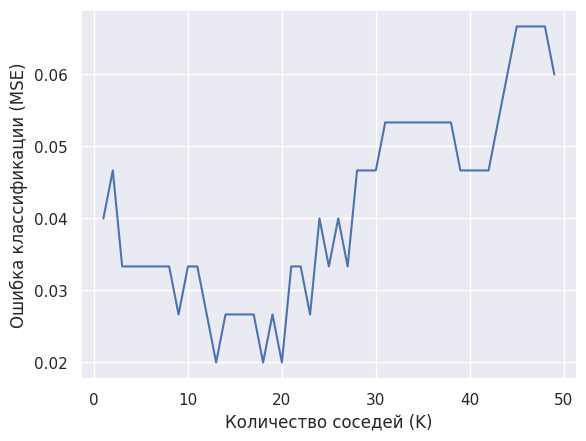

Оптимальные значения K:  [13, 18, 20]


In [ ]:
# cross_val_score используется для оценки качества модели с использованием кросс-валдиации
from sklearn.model_selection import cross_val_score
# Значения параметра К
k_list = list(range(1,50))
# Пустой список для хранения значений точности для каждого K
cv_scores = []
# В цикле проходим все значения К
for K in k_list:
  #Создается классификатор knn с параметром n_neighbors=K
  knn = KNeighborsClassifier(n_neighbors=K)

  # Признаки: d.iloc[:, 0:4] (первые 4 столбца)
  # d['answer'] - целевая переменная
  # Данные делятся на 10 равных частей
  # Метрика: accuracy
  scores = cross_val_score(knn, d.iloc[ : , 0:4 ], d['answer'], cv=10, scoring='accuracy')
  # Средняя точность для текущего K вычисляется и добавляется в cv_scores.
  cv_scores.append(scores.mean())
# Вычисляем ошибку (misclassification error) как MSE = 1 − accuracy.
MSE = [1-x for x in cv_scores]
# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()
# Ищем минимум
k_min = min(MSE) # минимальное значение ошибки MSE.
# Пробуем найти прочие минимумы (если их несколько)
all_k_min = [] # список всех K, при которых ошибка MSE минимальна.
for i in range(len(MSE)):
  if MSE[i] <= k_min:
    all_k_min.append(k_list[i])
# печатаем все К, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)

**Индивидуальное задание**

In [ ]:
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загрузка данных
file_path = "Pokemon.csv"
data = pd.read_table(file_path, delimiter=',')
data.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Для простоты выбрал числовые признаки и целевую переменную
# переименовал свой тип данных
features = ['HP', 'Attack', 'Defense', 'Speed']  # Признаки
target = 'Type 1'  # Целевая переменная (основной тип покемона)

# Оставляем только выбранные столбцы
data = data[features + [target]].dropna()

# Проверяем распределение целевого признака
print(data[target].value_counts())

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


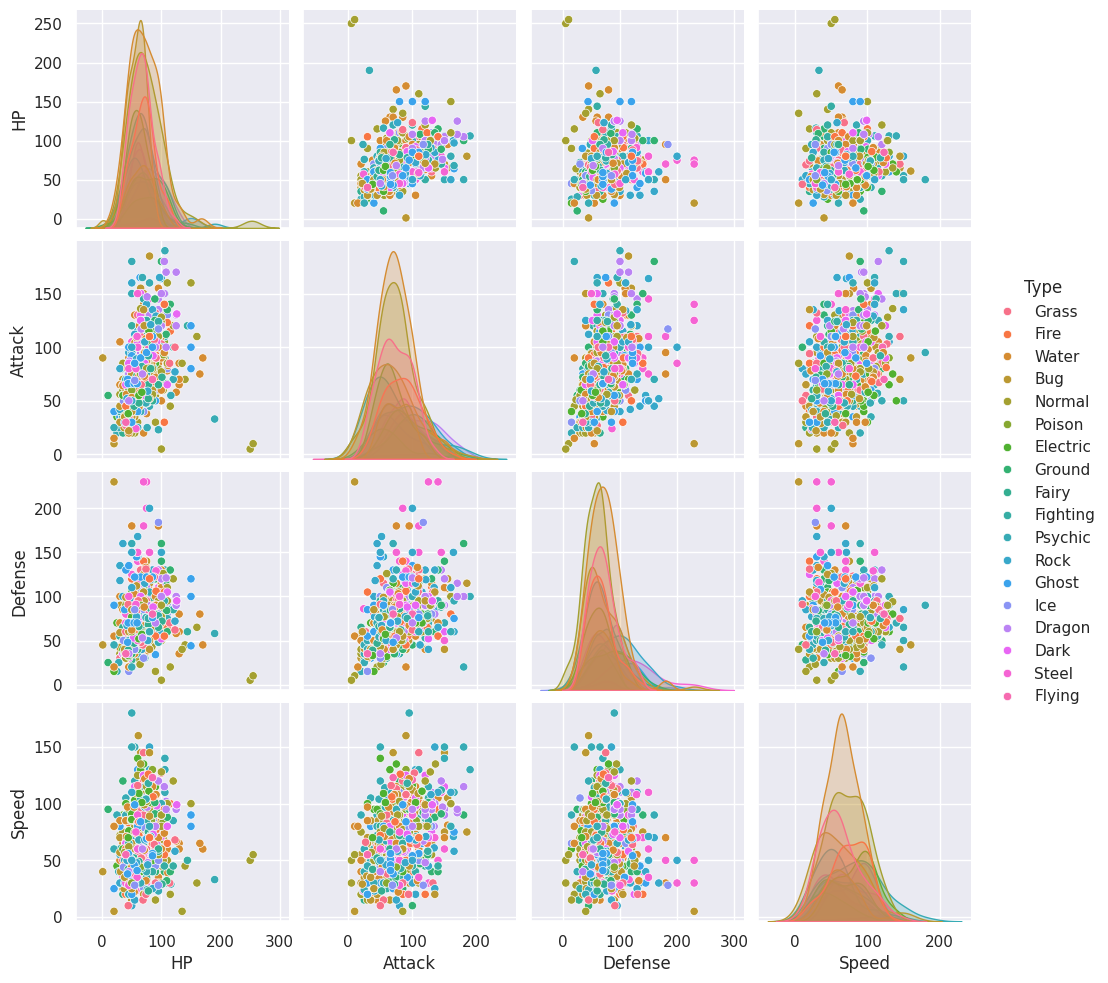

In [5]:
# Присваиваем символьные имена столбцам
data.columns = ['HP', 'Attack', 'Defense', 'Speed', 'Type']

# Визуализация данных
sns.pairplot(data, hue='Type')
plt.show()

Попарное признаковое распределение покемонов с разделением на классы


In [6]:
X_train = data[['HP', 'Attack', 'Defense', 'Speed']]
y_train = data['Type']

K = 16

knn = KNeighborsClassifier(n_neighbors=K)

knn.fit(X_train, y_train)

X_test = np.array([[40, 30, 35, 20]])

target = knn.predict(X_test)
print(target)

['Bug']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [15]:
# 2. Построение классификатора (пример на K=3)
X = data[features]
y = data['Type']

# Разделение данных на обучающую и тестовую выборки
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)

# Оценка качества на отложенной выборке
knn_pred = knn.predict(X_holdout)
accuracy = accuracy_score(y_holdout, knn_pred)
print(f'Hold-out accuracy (K={K}): {accuracy}')

Hold-out accuracy (K=16): 0.2125


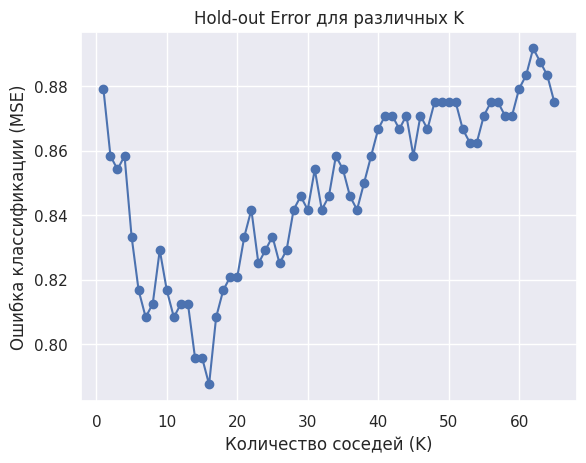

Оптимальные значения K: [16]


In [16]:
# Подбор оптимального значения K с помощью hold-out
k_values = range(1, 66)  # Все значения K от 1 до 65
holdout_scores = []  # Список для хранения точности для каждого K

# Проходим по всем значениям K
for K in k_values:
    knn = KNeighborsClassifier(n_neighbors=K)  # Создаем модель для текущего K
    knn.fit(X_train, y_train)  # Обучаем модель
    knn_pred = knn.predict(X_holdout)  # Предсказываем для отложенной выборки
    holdout_scores.append(accuracy_score(y_holdout, knn_pred))  # Сохраняем точность

# Преобразуем точность в ошибку (1 - accuracy)
holdout_errors = [1 - score for score in holdout_scores]

# Находим минимальное значение ошибки
min_error = min(holdout_errors)

# Ищем все K, для которых ошибка минимальна
# Цикл проходит по всем ошибкам:
# Если ошибка для K равна минимальной, соответствующее значение
# K добавляется в список optimal_k_values.
optimal_k_values = \
 [k_values[i] for i in range(len(holdout_errors))
 if holdout_errors[i] == min_error]

# Строим график зависимости ошибки от K
plt.plot(k_values, holdout_errors, marker='o')  # Добавляем маркер для визуализации точек
plt.xlabel('Количество соседей (K)')
plt.ylabel('Ошибка классификации (MSE)')
plt.title('Hold-out Error для различных K')
plt.show()

# Выводим все K с минимальной ошибкой
print(f"Оптимальные значения K: {optimal_k_values}")
